## Pytorch 連續型 nn

In [1]:
%matplotlib inline
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [2]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

x, y = torch.autograd.Variable(x), Variable(y)

# plt.scatter(x.data.numpy(), y.data.numpy())
# plt.show()

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


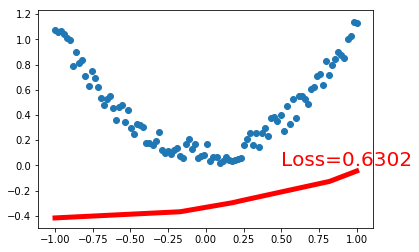

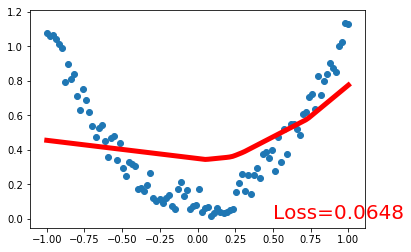

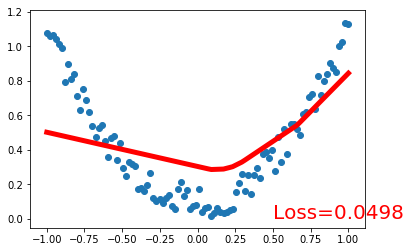

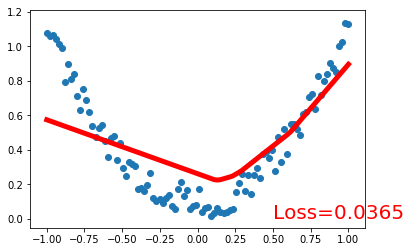

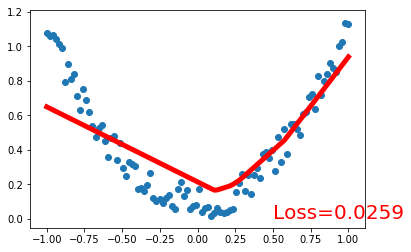

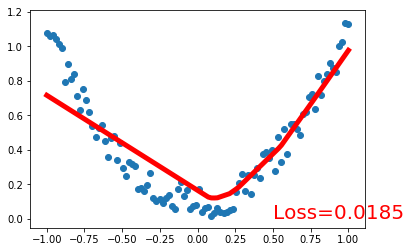

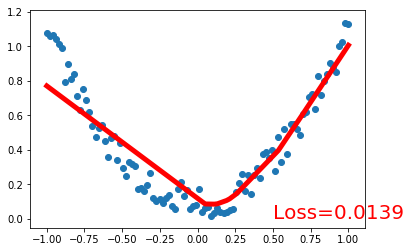

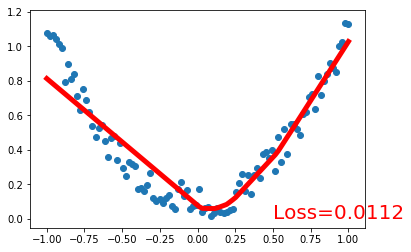

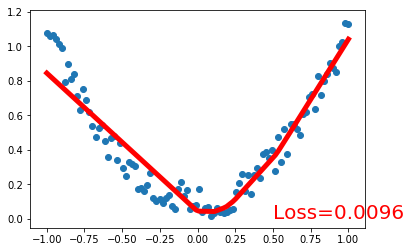

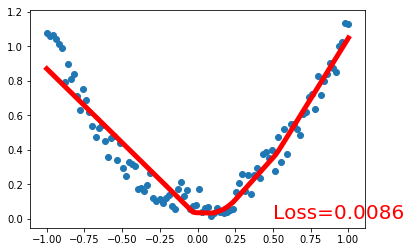

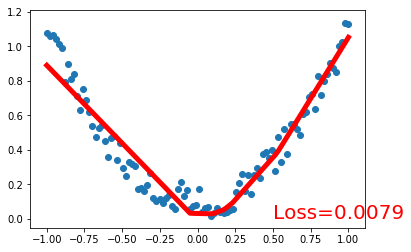

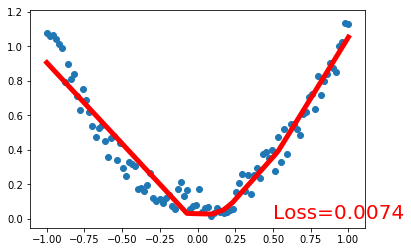

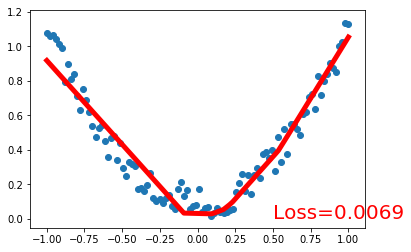

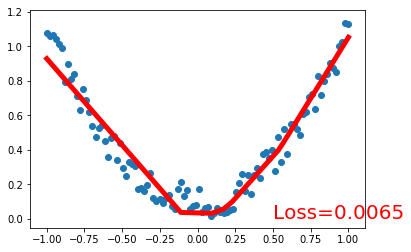

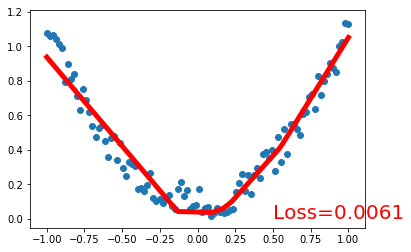

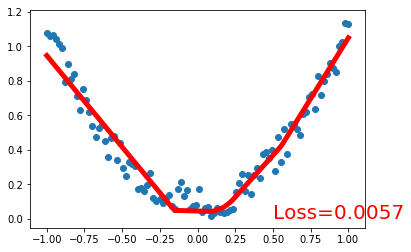

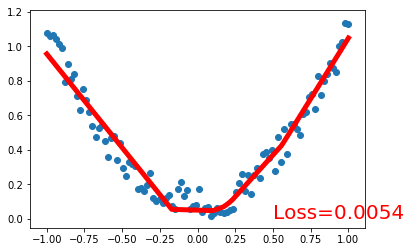

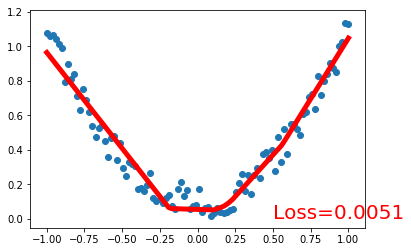

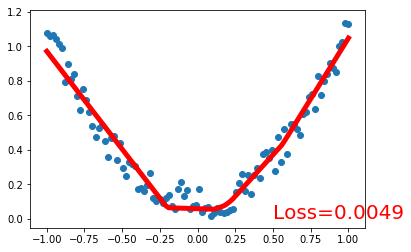

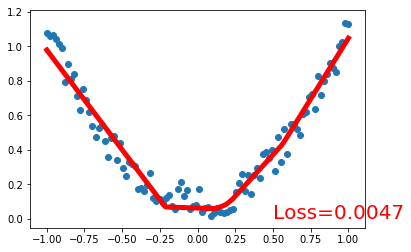

done 99


In [3]:
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output): #設計節點 （輸入特徵 幾層 輸出特徵）
        super(Net,self).__init__() #繼承 
        self.hidden=torch.nn.Linear(n_feature,n_hidden) #隱藏層.
        self.predict=torch.nn.Linear(n_hidden,n_output)  #預測層
        
    def forward(self,x):  #真正開始搭建nn
        x=F.relu(self.hidden(x)) #先轉層hidden layer 然後在用激動函數轉換
        x=self.predict(x) #預測  因為預測的值沒有範圍的限制 因此不需要使用激動函數
        return x
net=Net(1,10,1) 
print(net)

plt.ion()   #變成隨時更新的圖片
plt.show()


optimizer = torch.optim.SGD(net.parameters(),lr=0.5)  #最佳化nn
loss_func = torch.nn.MSELoss() #loss functin

for t in range(100): #100回
    prediction = net(x)
    loss=loss_func(prediction,y)  #比較誤差
    
    #最佳化過程
    optimizer.zero_grad() #先把optimizer 歸零
    loss.backward() #進行這一回的反向傳遞過程  計算梯度
    optimizer.step() #最佳化回合的梯度
    
    if t % 5 == 0: #每5步驟更新一次
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
plt.ioff()
plt.show()    
print("done",t)
    
    
    

## Pytorch 分類 nn

In [4]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt


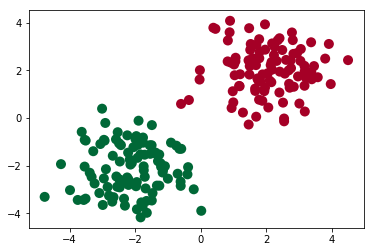

In [5]:
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)      # class0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # class0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # class1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)                # class1 y data (tensor), shape=(100, 1)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    #tensor 中label 一定要用long tensor表達

x, y = torch.autograd.Variable(x), Variable(y)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()


Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


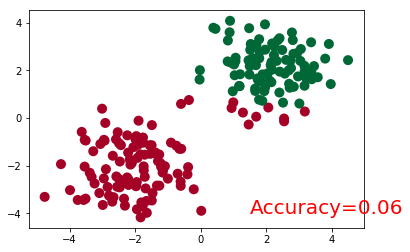

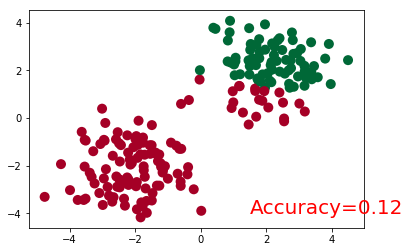

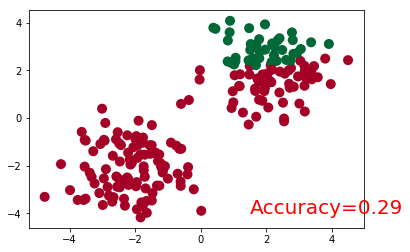

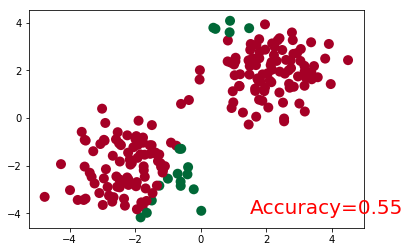

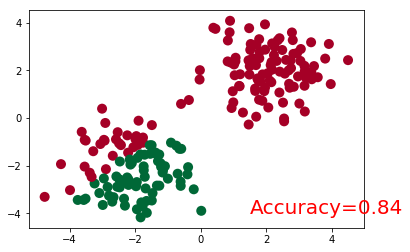

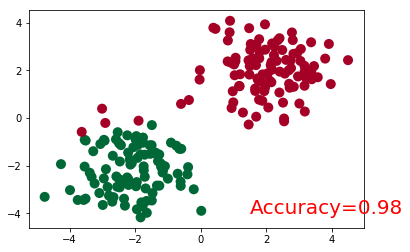

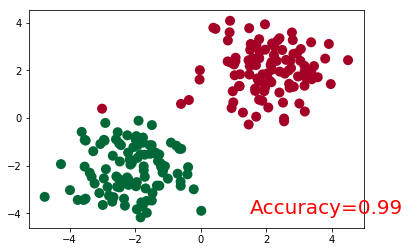

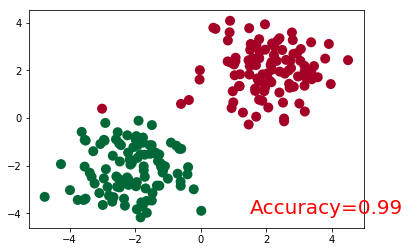

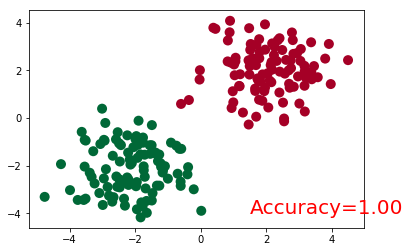

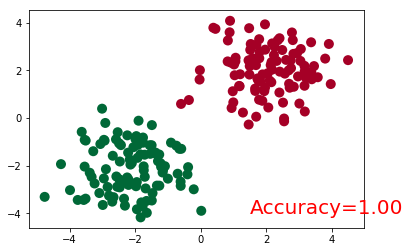

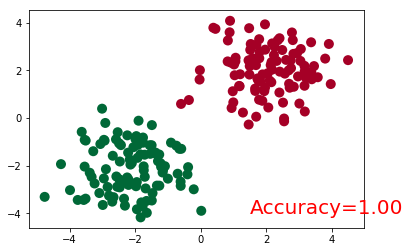

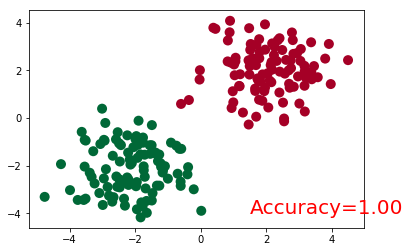

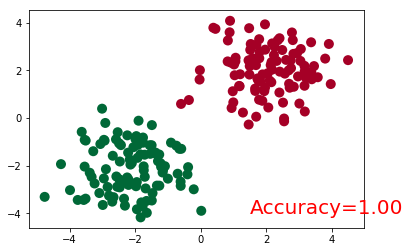

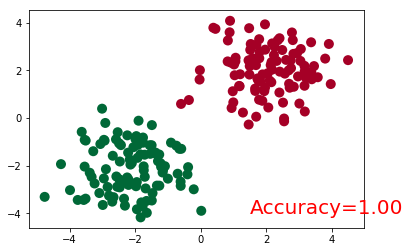

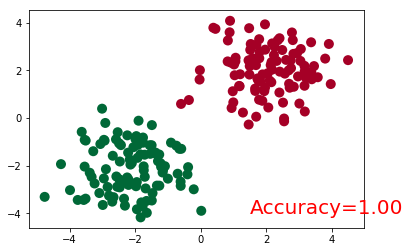

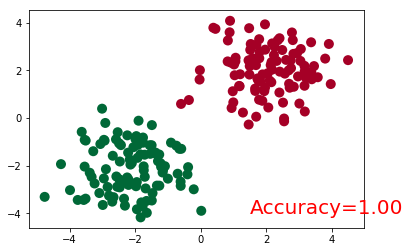

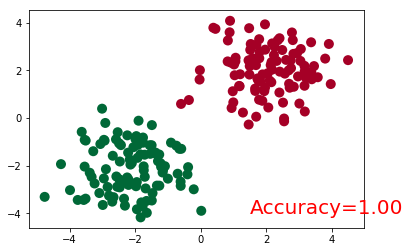

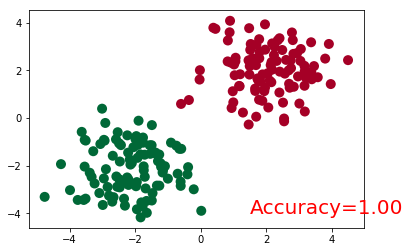

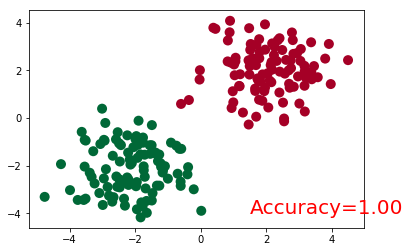

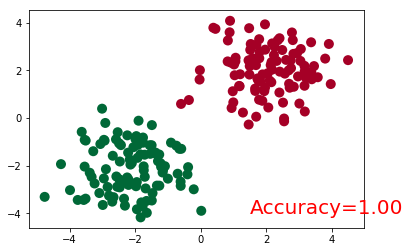

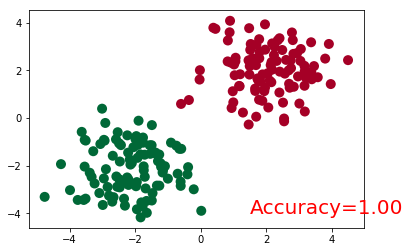

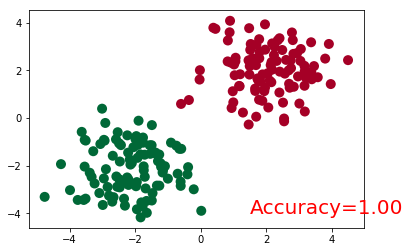

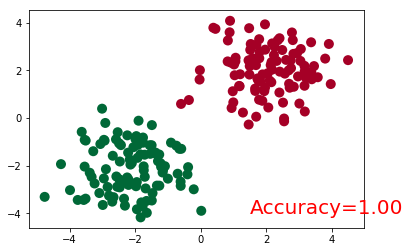

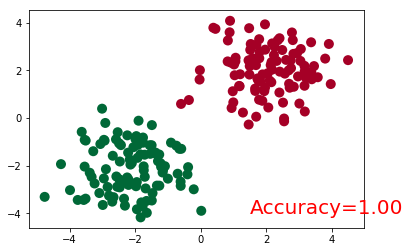

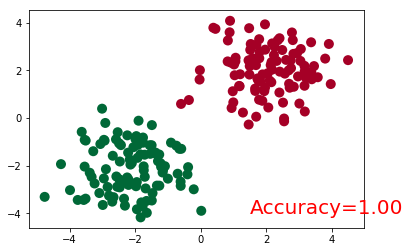

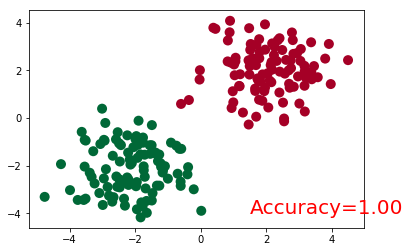

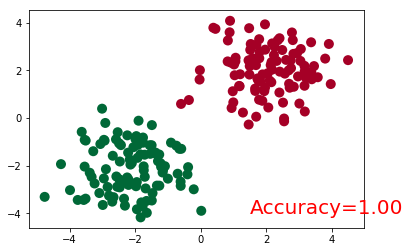

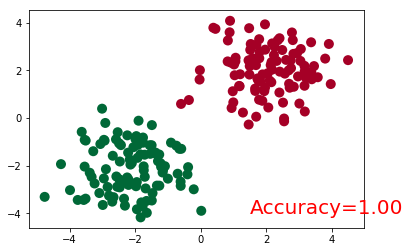

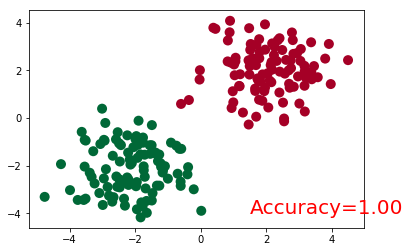

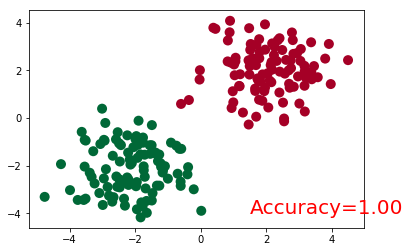

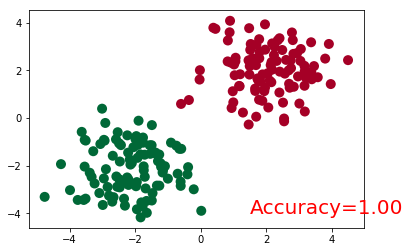

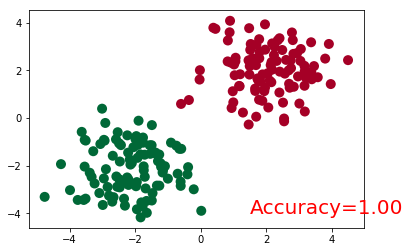

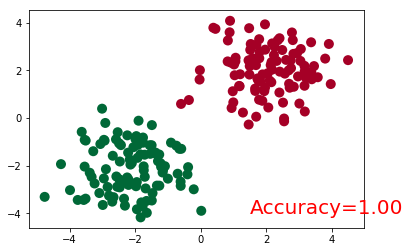

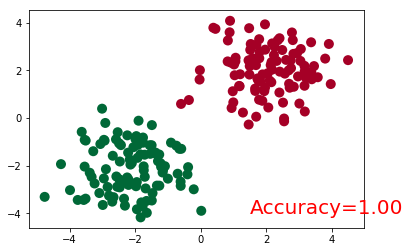

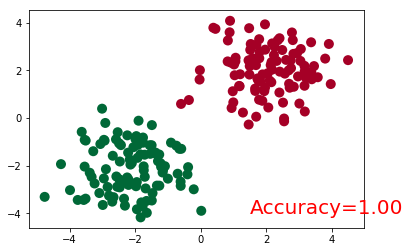

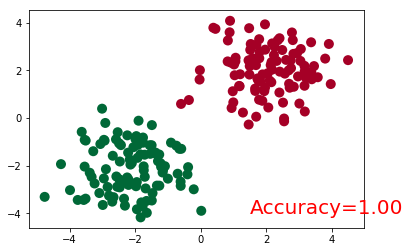

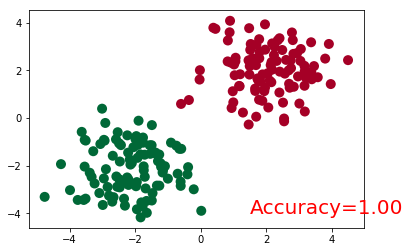

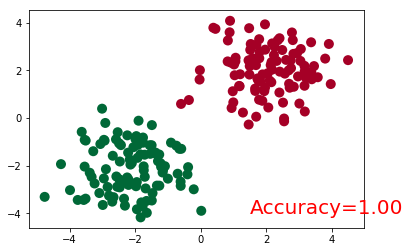

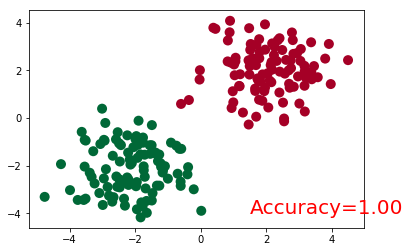

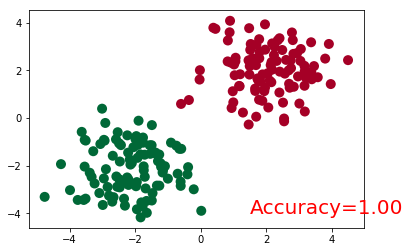

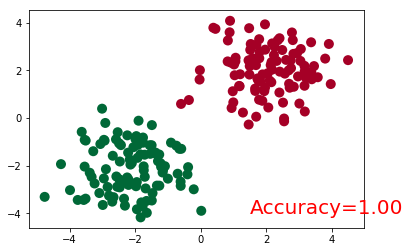

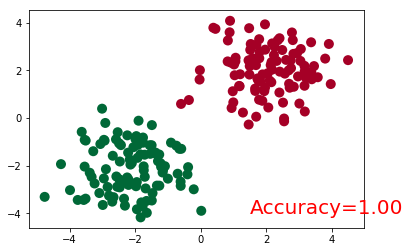

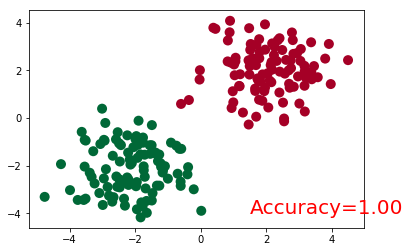

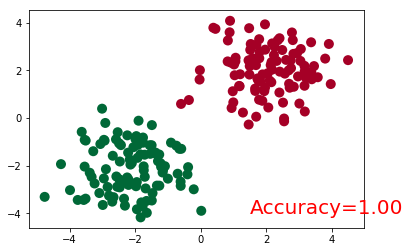

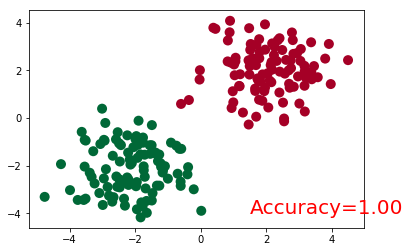

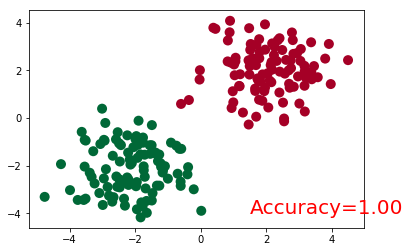

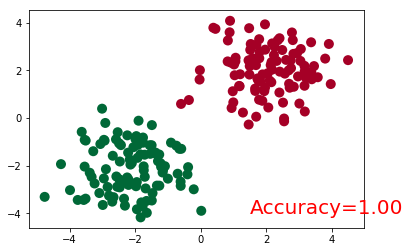

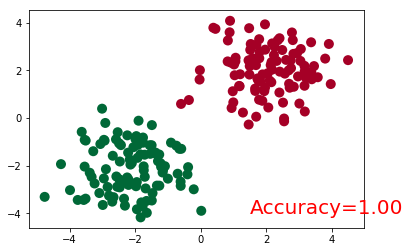

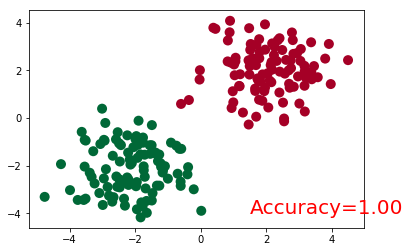

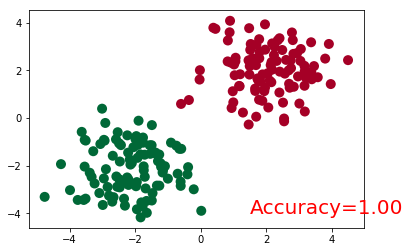

done 99


In [6]:
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output): #設計節點 （輸入特徵 幾層 輸出特徵）
        super(Net,self).__init__() #繼承 
        self.hidden=torch.nn.Linear(n_feature,n_hidden) #隱藏層.
        self.predict=torch.nn.Linear(n_hidden,n_output)  #預測層
        
    def forward(self,x):  #真正開始搭建nn
        x=F.relu(self.hidden(x)) #先轉層hidden layer 然後在用激動函數轉換
        x=self.predict(x) #預測  因為預測的值沒有範圍的限制 因此不需要使用激動函數
        return x
net=Net(2,10,2)
print(net)
plt.ion()   #變成隨時更新的圖片
plt.show()


optimizer = torch.optim.SGD(net.parameters(),lr=0.02)  #最佳化nn
loss_func = torch.nn.CrossEntropyLoss() #多類別問題 計算分到每個類別的機率以及label之間的誤差

for t in range(100): #100回
    out = net(x)
    loss=loss_func(out,y)  #比較誤差
    
    #最佳化過程
    optimizer.zero_grad() #先把optimizer 歸零
    loss.backward() #進行這一回的反向傳遞過程  計算梯度
    optimizer.step() #最佳化回合的梯度
    
    #F.softmax 像是僵直轉換成機率
    
    
    if t % 2 == 0: #每5步驟更新一次
        # plot and show learning process
        plt.cla()
        prediction = torch.max(F.softmax(out), 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
        
print("done",t)
    
    
    

## 另一種搭建nn的方法

In [7]:
net2=torch.nn.Sequential(  #搭建nn在這裡面
    torch.nn.Linear(2,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,2),
)
print(net)
print(net2)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)
Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=2, bias=True)
)


## 保存以及提取nn

In [15]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

x, y = torch.autograd.Variable(x), Variable(y)


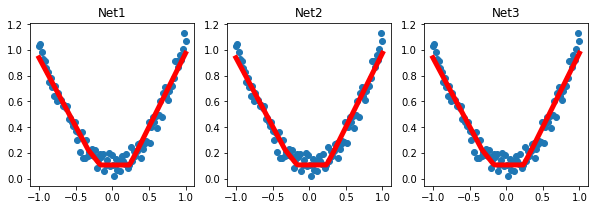

In [24]:
def save():
    net1=torch.nn.Sequential(  #搭建nn在這裡面
        torch.nn.Linear(1,10),
        torch.nn.ReLU(),
        torch.nn.Linear(10,1),
    )
    optimizer = torch.optim.SGD(net1.parameters(),lr=0.5)  
    loss_func = torch.nn.MSELoss() 
    
    for t in range(100): #100回
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    plt.figure(1, figsize=(10, 3))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

    torch.save(net1,'net.pkl') #本存整個 nn
    torch.save(net1.state_dict(),'net_params.pkl') #保存成參數的部份

def restore_net():
    net2=torch.load('net.pkl') #提取 nn
    prediction = net2(x)

    # plot result
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
def restore_params():
    net3=torch.nn.Sequential(  #搭建nn在這裡面
        torch.nn.Linear(1,10),
        torch.nn.ReLU(),
        torch.nn.Linear(10,1),
    )
    net3.load_state_dict(torch.load('net_params.pkl')) #提取僅有參數的部份
    prediction = net3(x)

    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.show()
    
# save net1
save()

# restore entire net (may slow)
restore_net()

# restore only the net parameters
restore_params()
    

##  mini bath traning

In [26]:
import torch
import torch.utils.data as Data

In [29]:


Batch_SISE = 5 #每一個batch 裡面含有的資料點數

x=torch.linspace(1,10,10)
y=torch.linspace(10,1,10)

torch_dataset=Data.TensorDataset(data_tensor=x,target_tensor=y)
loader = Data.DataLoader(   #將資料切成小batch
    dataset=torch_dataset,
    batch_size=Batch_SISE,
    shuffle=True,  #每一次重新訓練的時候 是否要打亂資料點順序
    num_workers=2

)  

for epoch in range(3): # 整體資料訓練三次
    for step,(batch_x,batch_y) in enumerate(loader):  #enumerate 提供索引
        print('Epoch: ', epoch, '| Step: ', step, '| batch x: ',
              batch_x.numpy(), '| batch y: ', batch_y.numpy())        
        



Epoch:  0 | Step:  0 | batch x:  [ 4. 10.  1.  8.  2.] | batch y:  [ 7.  1. 10.  3.  9.]
Epoch:  0 | Step:  1 | batch x:  [6. 5. 9. 3. 7.] | batch y:  [5. 6. 2. 8. 4.]
Epoch:  1 | Step:  0 | batch x:  [ 3.  4. 10.  5.  2.] | batch y:  [8. 7. 1. 6. 9.]
Epoch:  1 | Step:  1 | batch x:  [6. 1. 9. 7. 8.] | batch y:  [ 5. 10.  2.  4.  3.]
Epoch:  2 | Step:  0 | batch x:  [ 5.  8.  3.  2. 10.] | batch y:  [6. 3. 8. 9. 1.]
Epoch:  2 | Step:  1 | batch x:  [6. 1. 7. 4. 9.] | batch y:  [ 5. 10.  4.  7.  2.]


## optimizer 訓練最佳化


In [31]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt


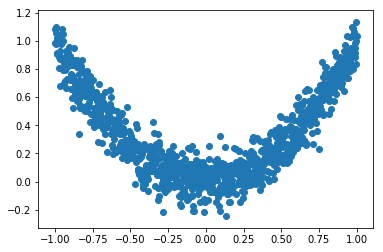

In [32]:
#hypter paramter

LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

# fake dataset
x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))

plt.scatter(x.numpy(), y.numpy())
plt.show()




0
1
2
3
4
5
6
7
8
9
10
11


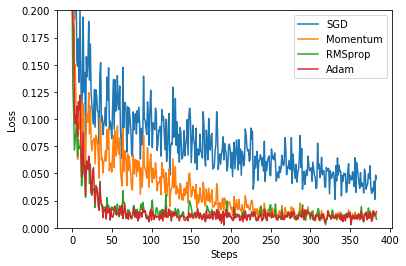

In [39]:
# optimizer=torch.optim.SGD()  #很基礎的最佳化方法  類似mini batch 的效果
torch_dataset = Data.TensorDataset(data_tensor=x, target_tensor=y)
loader = Data.DataLoader(dataset=torch_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2,)

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1, 20)   # hidden layer
        self.predict = torch.nn.Linear(20, 1)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x
    
net_SGD      =Net()
net_Momentum =Net()
net_RMSprop  =Net()
net_Adam     =Net()
nets=[net_SGD,net_Momentum,net_RMSprop,net_Adam]

opt_SGD         = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum    = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
opt_RMSprop     = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam        = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

loss_func=torch.nn.MSELoss()
losses_his=[[],[],[],[]]

for epoch in range(EPOCH):
    print(epoch)
    for step,(batch_x,batch_y) in enumerate(loader):
        b_x=Variable(batch_x)
        b_y=Variable(batch_y)
        
        for net,opt,l_his in zip(nets,optimizers,losses_his):
            output = net(b_x)              # get output for every net
            loss = loss_func(output, b_y)  # compute loss for every net
            opt.zero_grad()                # clear gradients for next train
            loss.backward()                # backpropagation, compute gradients
            opt.step()                     # apply gradients
            l_his.append(loss.data[0])     # loss recoder
            
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()


##  CNN

In [56]:
import os

# third-party library
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

torch.Size([60000, 28, 28])
torch.Size([60000])


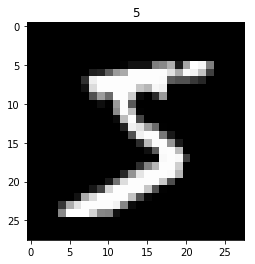

In [57]:
# Hyper Parameters
EPOCH = 1               # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 50
LR = 0.001              # learning rate
DOWNLOAD_MNIST = False

train_data=torchvision.datasets.MNIST(
    root='./mnist',
    train=True,
    transform=torchvision.transforms.ToTensor(),  # 將像素點 都壓縮報 0 1 之間
    download=DOWNLOAD_MNIST
    
)


print(train_data.train_data.size())                 # (60000, 28, 28)
print(train_data.train_labels.size())               # (60000)
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()


CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)
Epoch:  0 | train loss: 2.3036 | test accuracy: 0.11


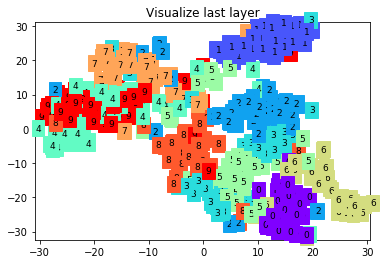

Epoch:  0 | train loss: 0.4659 | test accuracy: 0.83


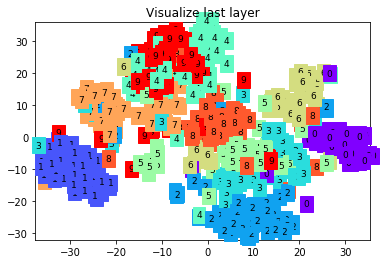

Epoch:  0 | train loss: 0.2354 | test accuracy: 0.88


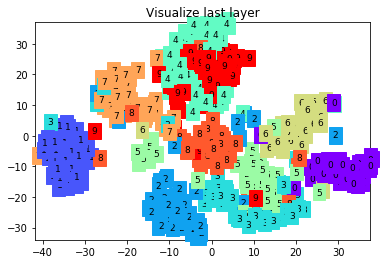

Epoch:  0 | train loss: 0.2259 | test accuracy: 0.91


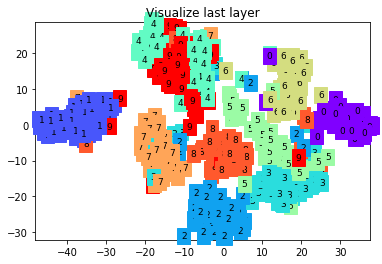

Epoch:  0 | train loss: 0.2747 | test accuracy: 0.93


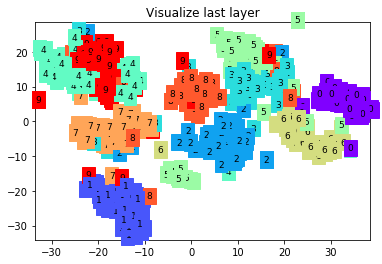

Epoch:  0 | train loss: 0.0726 | test accuracy: 0.94


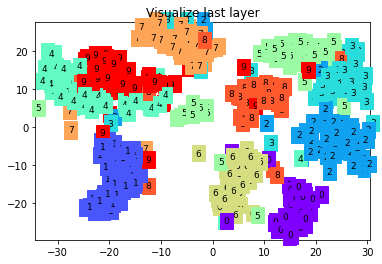

Epoch:  0 | train loss: 0.1035 | test accuracy: 0.95


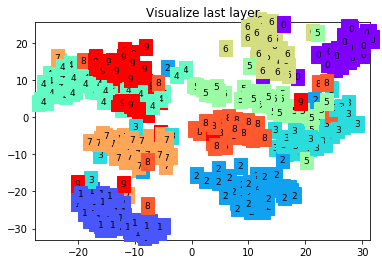

Epoch:  0 | train loss: 0.2061 | test accuracy: 0.95


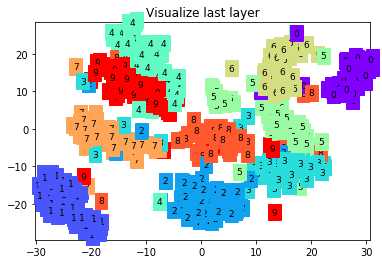

Epoch:  0 | train loss: 0.1329 | test accuracy: 0.95


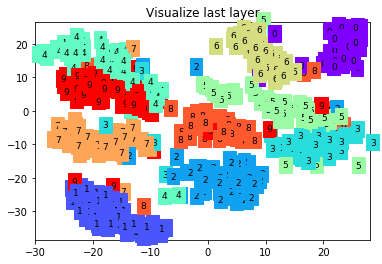

Epoch:  0 | train loss: 0.1150 | test accuracy: 0.96


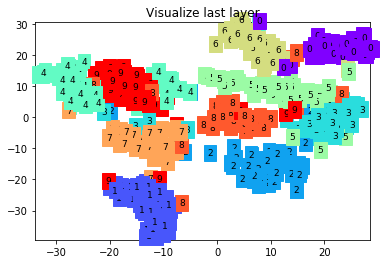

Epoch:  0 | train loss: 0.0605 | test accuracy: 0.97


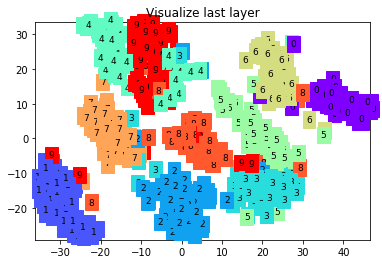

Epoch:  0 | train loss: 0.1117 | test accuracy: 0.95


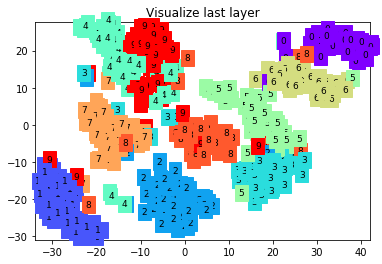

Epoch:  0 | train loss: 0.0156 | test accuracy: 0.97


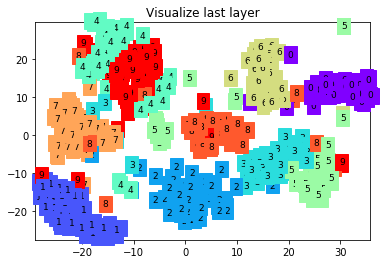

Epoch:  0 | train loss: 0.1095 | test accuracy: 0.97


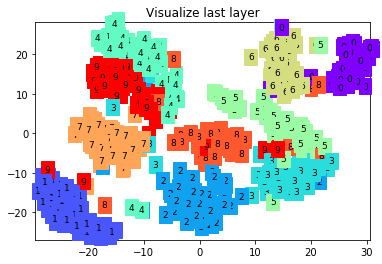

Epoch:  0 | train loss: 0.2718 | test accuracy: 0.96


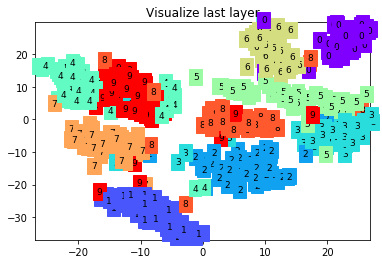

Epoch:  0 | train loss: 0.1489 | test accuracy: 0.97


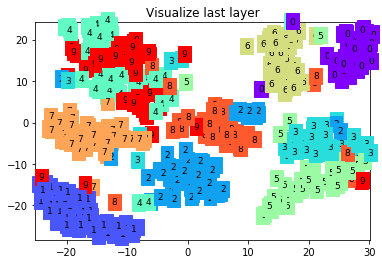

Epoch:  0 | train loss: 0.0549 | test accuracy: 0.97


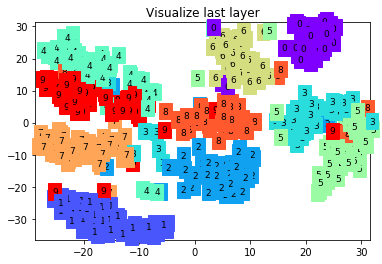

Epoch:  0 | train loss: 0.0784 | test accuracy: 0.97


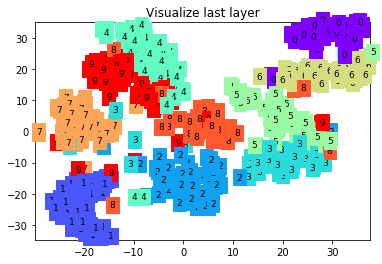

Epoch:  0 | train loss: 0.0205 | test accuracy: 0.97


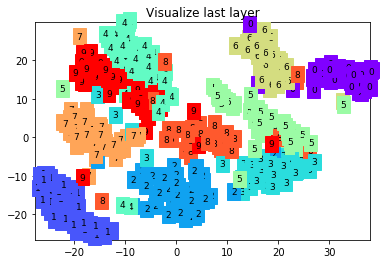

Epoch:  0 | train loss: 0.1531 | test accuracy: 0.97


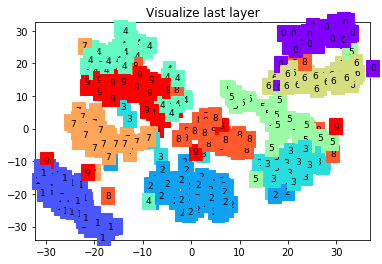

Epoch:  0 | train loss: 0.0368 | test accuracy: 0.97


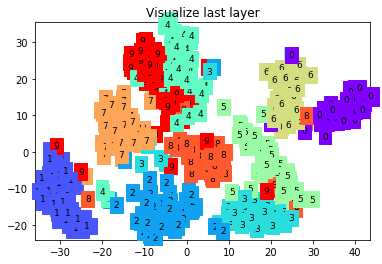

Epoch:  0 | train loss: 0.0433 | test accuracy: 0.98


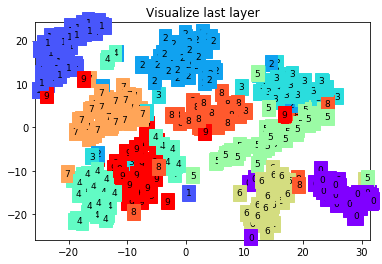

Epoch:  0 | train loss: 0.0093 | test accuracy: 0.98


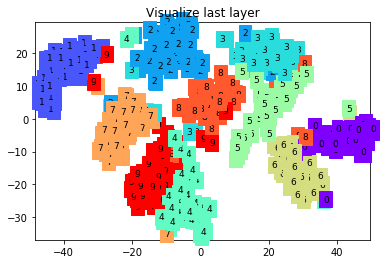

Epoch:  0 | train loss: 0.0249 | test accuracy: 0.98


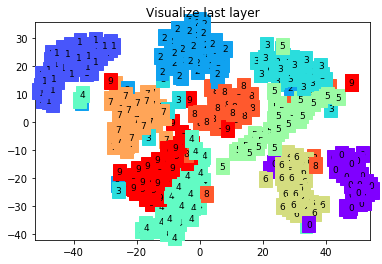

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number


In [66]:
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

#test_data 未處理因此仍是0-255
test_data=test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1), volatile=True).type(torch.FloatTensor)[:2000]/255.   # shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = test_data.test_labels[:2000]

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 =nn.Sequential( #卷基層   
            nn.Conv2d(
                in_channels  = 1  , # 圖片是有幾層的 若 RGB三層 灰階 1層
                out_channels = 16 , # 同時16個filter 進行掃描 會提取16個特徵 代表下一層高度為16
                kernel_size  = 5  , # 一次畫出來的框 畫幾格 ex 5*5
                stride       = 1  , # 每一個框框跳幾格
                padding      = 2  , # 在 5x5逐步掃描後會有少的格子 因此2代表在外面為兩圈的0
                                    # if stride =1 padding = (kernel_size-1)/2 = 2
            ),  # 過濾器 卷基層 蒐集圖片訊息 三維的空間  
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), #找出更重要的特徵  像是在2x2中 找到 最大的值
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16,32,5,1,2), # 輸入的是上一層的16 把輸出層在變大因此是32 其他不變
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        #原先圖片的大小為 1,28,28
        #第一次 Conv2d 16,28,28
        #第一次 Relu 16,28,28
        #第一次 MaxPool2d 16,14,14
        ##########################
        #第二次 Conv2d 32,14,14
        #第二次 Relu 32,14,14
        #第二次 MaxPool2d 32,7,7  ==> 32*7*7
        
        self.out = nn.Linear(32*7*7,10) # 10 個分類  
    def forward(self,x):
        x=self.conv1(x)
        x=self.conv2(x) #(batch.32.7.7)
        x=x.view(x.size(0),-1) #將三維轉二維 (batch , 32*7*7)
        output=self.out(x)
        return output,x
cnn=CNN()
print(cnn)

optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

# following function (plot_with_labels) is for visualization, can be ignored if not interested
from matplotlib import cm
try: from sklearn.manifold import TSNE; HAS_SK = True
except: HAS_SK = False; print('Please install sklearn for layer visualization')
def plot_with_labels(lowDWeights, labels):
    plt.cla()
    X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
    for x, y, s in zip(X, Y, labels):
        c = cm.rainbow(int(255 * s / 9)); plt.text(x, y, s, backgroundcolor=c, fontsize=9)
    plt.xlim(X.min(), X.max()); plt.ylim(Y.min(), Y.max()); plt.title('Visualize last layer'); plt.show(); plt.pause(0.01)

plt.ion()
# training and testing
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
        b_x = Variable(x)   # batch x
        b_y = Variable(y)   # batch y

        output = cnn(b_x)[0]               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 50 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = sum(pred_y == test_y) / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data[0], '| test accuracy: %.2f' % accuracy)
            if HAS_SK:
                # Visualization of trained flatten layer (T-SNE)
                tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
                plot_only = 500
                low_dim_embs = tsne.fit_transform(last_layer.data.numpy()[:plot_only, :])
                labels = test_y.numpy()[:plot_only]
                plot_with_labels(low_dim_embs, labels)
plt.ioff()

# print 10 predictions from test data
test_output, _ = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')